# Lib import

In [140]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix 
from sklearn.inspection import permutation_importance
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
import plotly
from sklearn.model_selection import GridSearchCV
from prettytable import prettytable

# data import

In [233]:
df = pd.read_csv("C:\\Users\\Chris\\Downloads\\MushroomDataset (1)\\MushroomDataset\\secondary_data.csv", index_col=0, sep=";")

In [234]:
df = df.reset_index()

In [88]:
df.tail(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
61059,p,1.15,f,s,y,f,f,f,f,2.83,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61060,p,1.13,x,s,y,f,f,f,f,3.06,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61061,p,1.25,x,s,y,f,f,f,f,4.40,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61062,p,1.25,s,s,y,f,f,f,f,3.51,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61063,p,1.42,x,s,y,f,f,f,f,4.88,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61068,p,1.17,s,s,y,f,f,f,f,3.25,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\2994547945.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


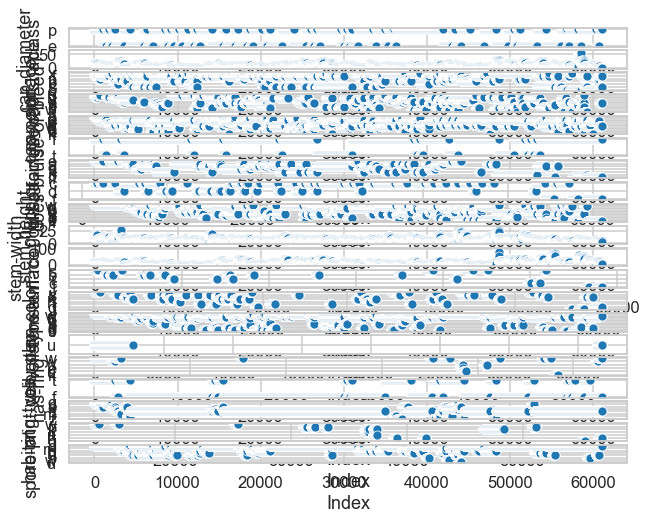

In [237]:
fig, axs = plt.subplots(nrows=len(df.columns) - 1, ncols=1, figsize=(10, 8))

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(x=df.index, y=df[feature], ax=axs[i])
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel(feature)
    
plt.tight_layout()
plt.show()

# Minority features


C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


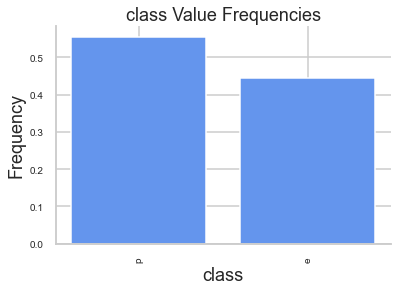

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


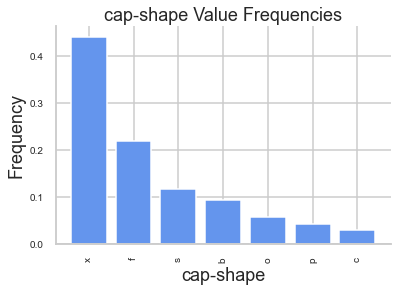

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


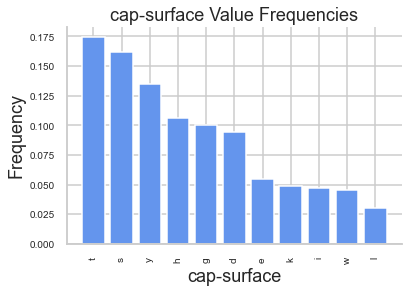

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


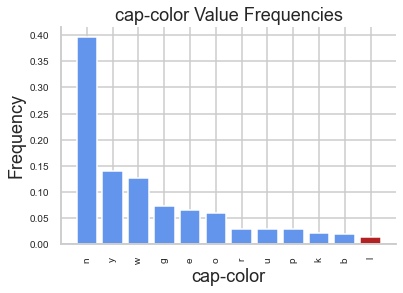

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


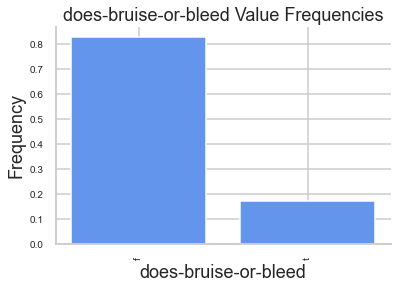

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


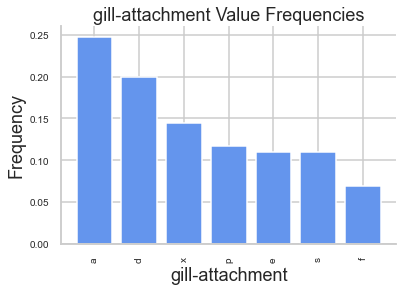

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


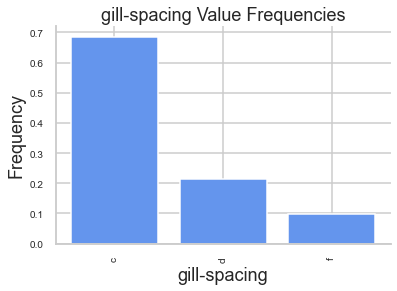

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


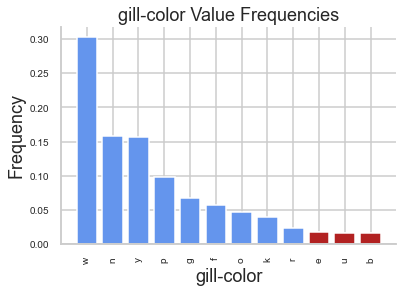

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


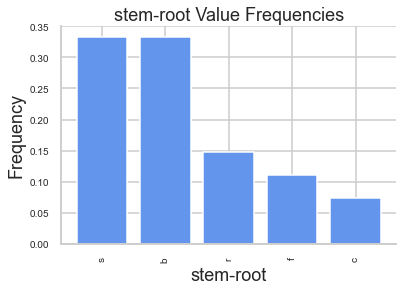

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


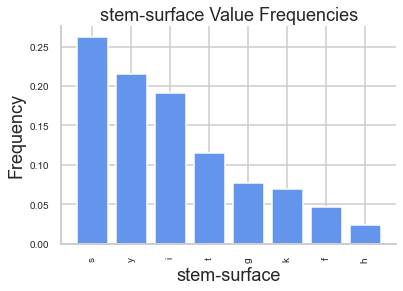

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


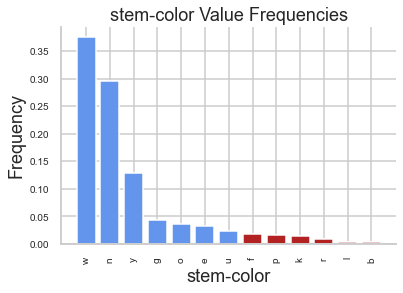

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


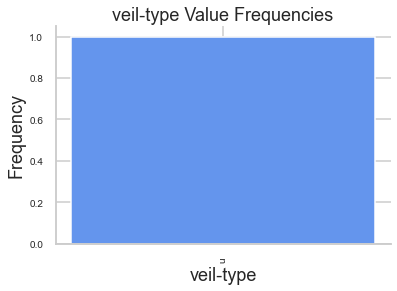

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


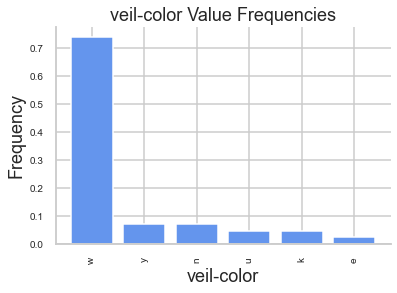

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


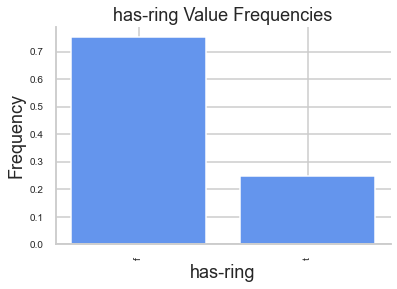

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


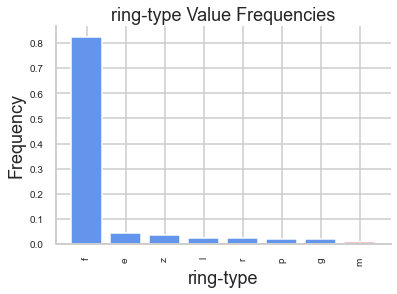

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


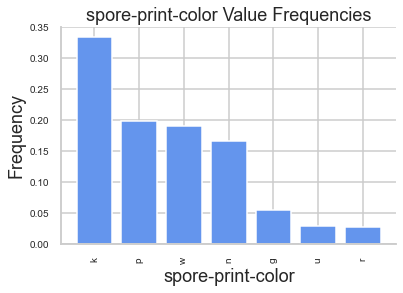

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


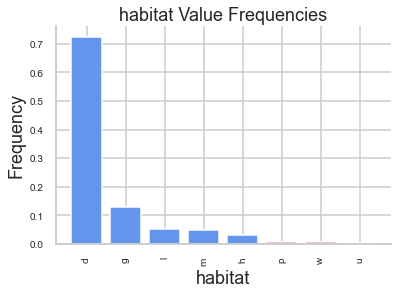

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3338391537.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index, rotation=90)


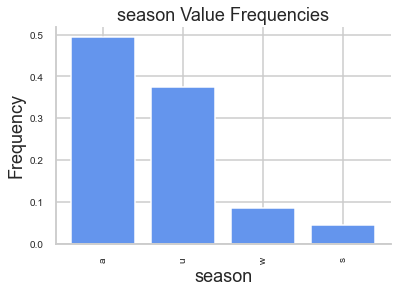

In [242]:
for feature in df.select_dtypes(include=['object']):
    counts = df[feature].value_counts(normalize=True)
    minority_values = counts[counts < 0.02]
    fig, ax = plt.subplots()
    ax.bar(counts.index, counts.values, color='cornflowerblue', edgecolor='white')
    ax.set_xticklabels(counts.index, rotation=90)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f"{feature} Value Frequencies")
    for value in minority_values.index:
        ax.bar(value, counts.loc[value], color='firebrick', edgecolor='white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=10)
    plt.show()

# EDA

In [5]:
###unique values
counts = df.nunique()
counts

class                      2
cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-root                  5
stem-surface               8
stem-color                13
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  8
spore-print-color          7
habitat                    8
season                     4
dtype: int64

In [6]:
### nan counts
nan_counts = df.isna().sum()
nan_counts/len(df)


class                   0.000000
cap-diameter            0.000000
cap-shape               0.000000
cap-surface             0.231214
cap-color               0.000000
does-bruise-or-bleed    0.000000
gill-attachment         0.161850
gill-spacing            0.410405
gill-color              0.000000
stem-height             0.000000
stem-width              0.000000
stem-root               0.843931
stem-surface            0.624277
stem-color              0.000000
veil-type               0.947977
veil-color              0.878613
has-ring                0.000000
ring-type               0.040462
spore-print-color       0.895954
habitat                 0.000000
season                  0.000000
dtype: float64

In [7]:
### examination

# Feature Engineering/ munging 

In [8]:
###cehcking unique values for categorical variables.
counts = df.nunique()
counts

class                      2
cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-root                  5
stem-surface               8
stem-color                13
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  8
spore-print-color          7
habitat                    8
season                     4
dtype: int64

In [9]:
## further nan analysis
nan_counts/len(df)

class                   0.000000
cap-diameter            0.000000
cap-shape               0.000000
cap-surface             0.231214
cap-color               0.000000
does-bruise-or-bleed    0.000000
gill-attachment         0.161850
gill-spacing            0.410405
gill-color              0.000000
stem-height             0.000000
stem-width              0.000000
stem-root               0.843931
stem-surface            0.624277
stem-color              0.000000
veil-type               0.947977
veil-color              0.878613
has-ring                0.000000
ring-type               0.040462
spore-print-color       0.895954
habitat                 0.000000
season                  0.000000
dtype: float64

In [120]:
## dropping columns with 80%+ nans

df = df.drop(['stem-root', 'veil-type', 'veil-color', 'spore-print-color', 'stem-surface'], axis = 1)

In [11]:
#examination of features with nans
## baseline counts

base_counts = []

for i, col in enumerate(df.columns):
    value_counts = df[col].value_counts()
    base_counts.append(value_counts)

norm_counts = []

for i in base_counts:
    x = i/len(df)
    norm_counts.append(x)
#print(norm_counts) 


## gill attachment
df_ga_na = df[df['gill-attachment'].isna()]
df_ga = df[~df['gill-attachment'].isna()]

gana_counts = []
norm_gana_counts =[]
ga_counts = []
norm_ga_counts = []

for i, col in enumerate(df_ga_na.columns):
    value_counts = df_ga_na[col].value_counts()
    gana_counts.append(value_counts)
    
for i in gana_counts:
    x = i/len(df_ga_na)
    norm_gana_counts.append(x)

    value_counts.plot(kind='bar', ax=axes[i], rot=0)
    axes[i].set_title(col)
    
    
    
for i, col in enumerate(df_ga.columns):
    value_counts = df_ga[col].value_counts()
    ga_counts.append(value_counts)
    
    
for i in base_counts:
    x = i/len(df_ga)
    norm_ga_counts.append(x)

    
print(norm_counts[2])
    
#comp_ga = []

#for i in norm_ga_counts:
#    y = norm_ga_counts[i]/norm_counts[i]
#    comp_ga.append(y)

#[a/b for a, b in zip(norm_ga_counts, norm_counts)]

NameError: name 'axes' is not defined

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\3400510904.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


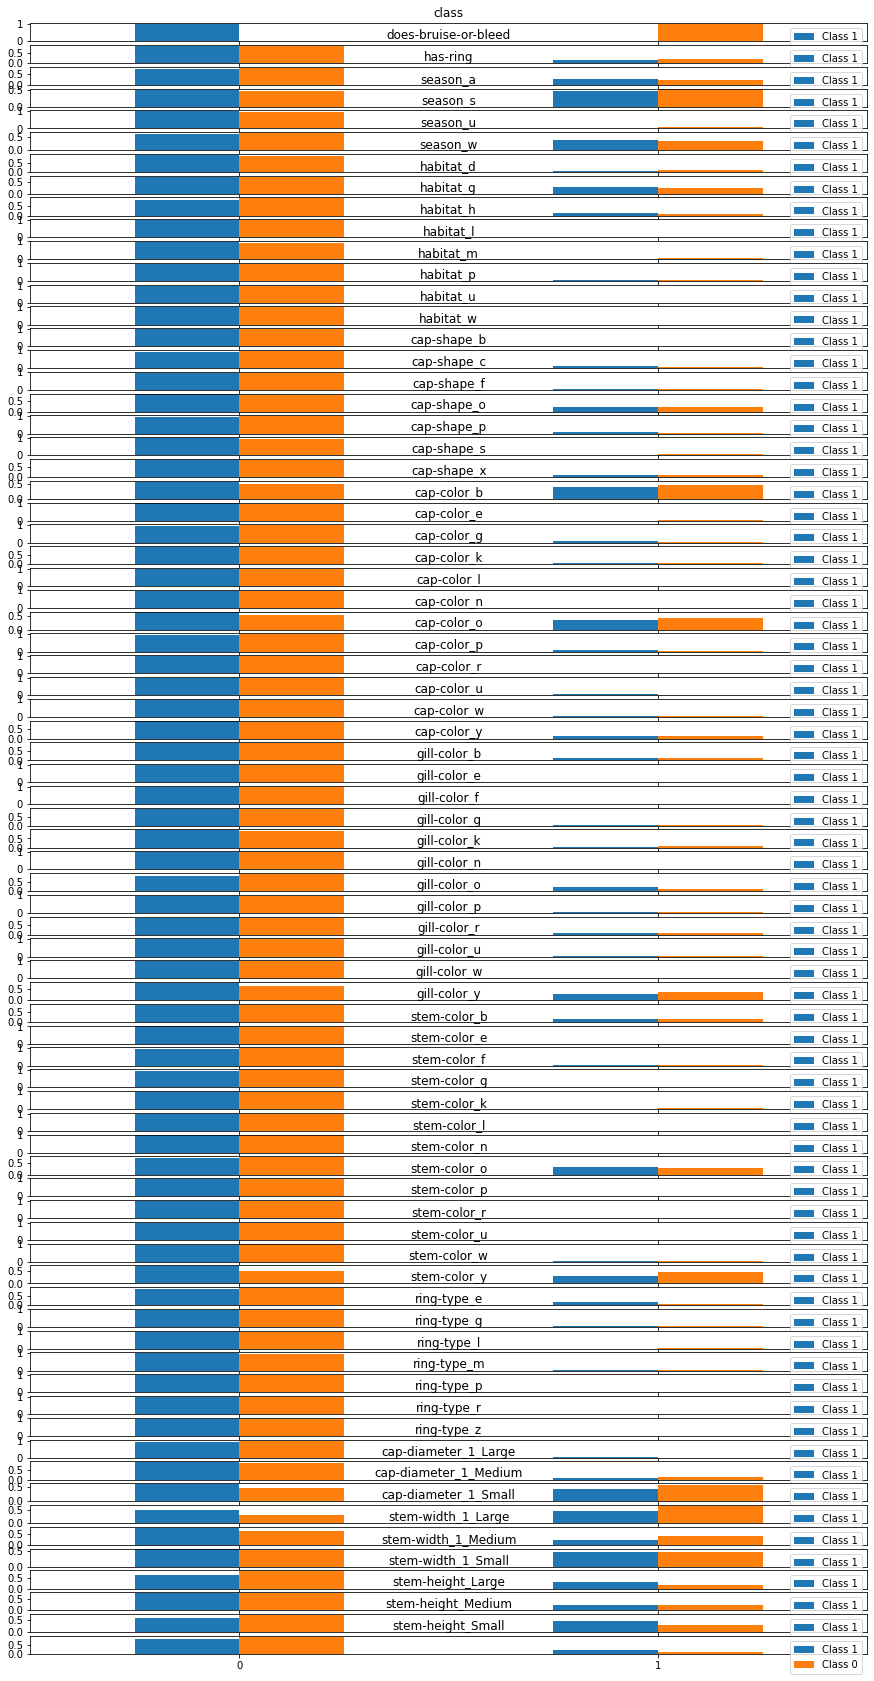

In [83]:
def plot_normalized_value_counts(column, ax):
    value_counts_1 = df[df['class']==1][column].value_counts(normalize=True)
    value_counts_0 = df[df['class']==0][column].value_counts(normalize=True)
    value_counts = pd.concat([value_counts_1, value_counts_0], axis=1, keys=['Class 1', 'Class 0'])
    value_counts.plot(kind='bar', ax=ax, rot=0)
    ax.set_title(column)

fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 30))

for i, col in enumerate(df.columns):
    plot_normalized_value_counts(col, axes[i])

plt.tight_layout()
plt.show()

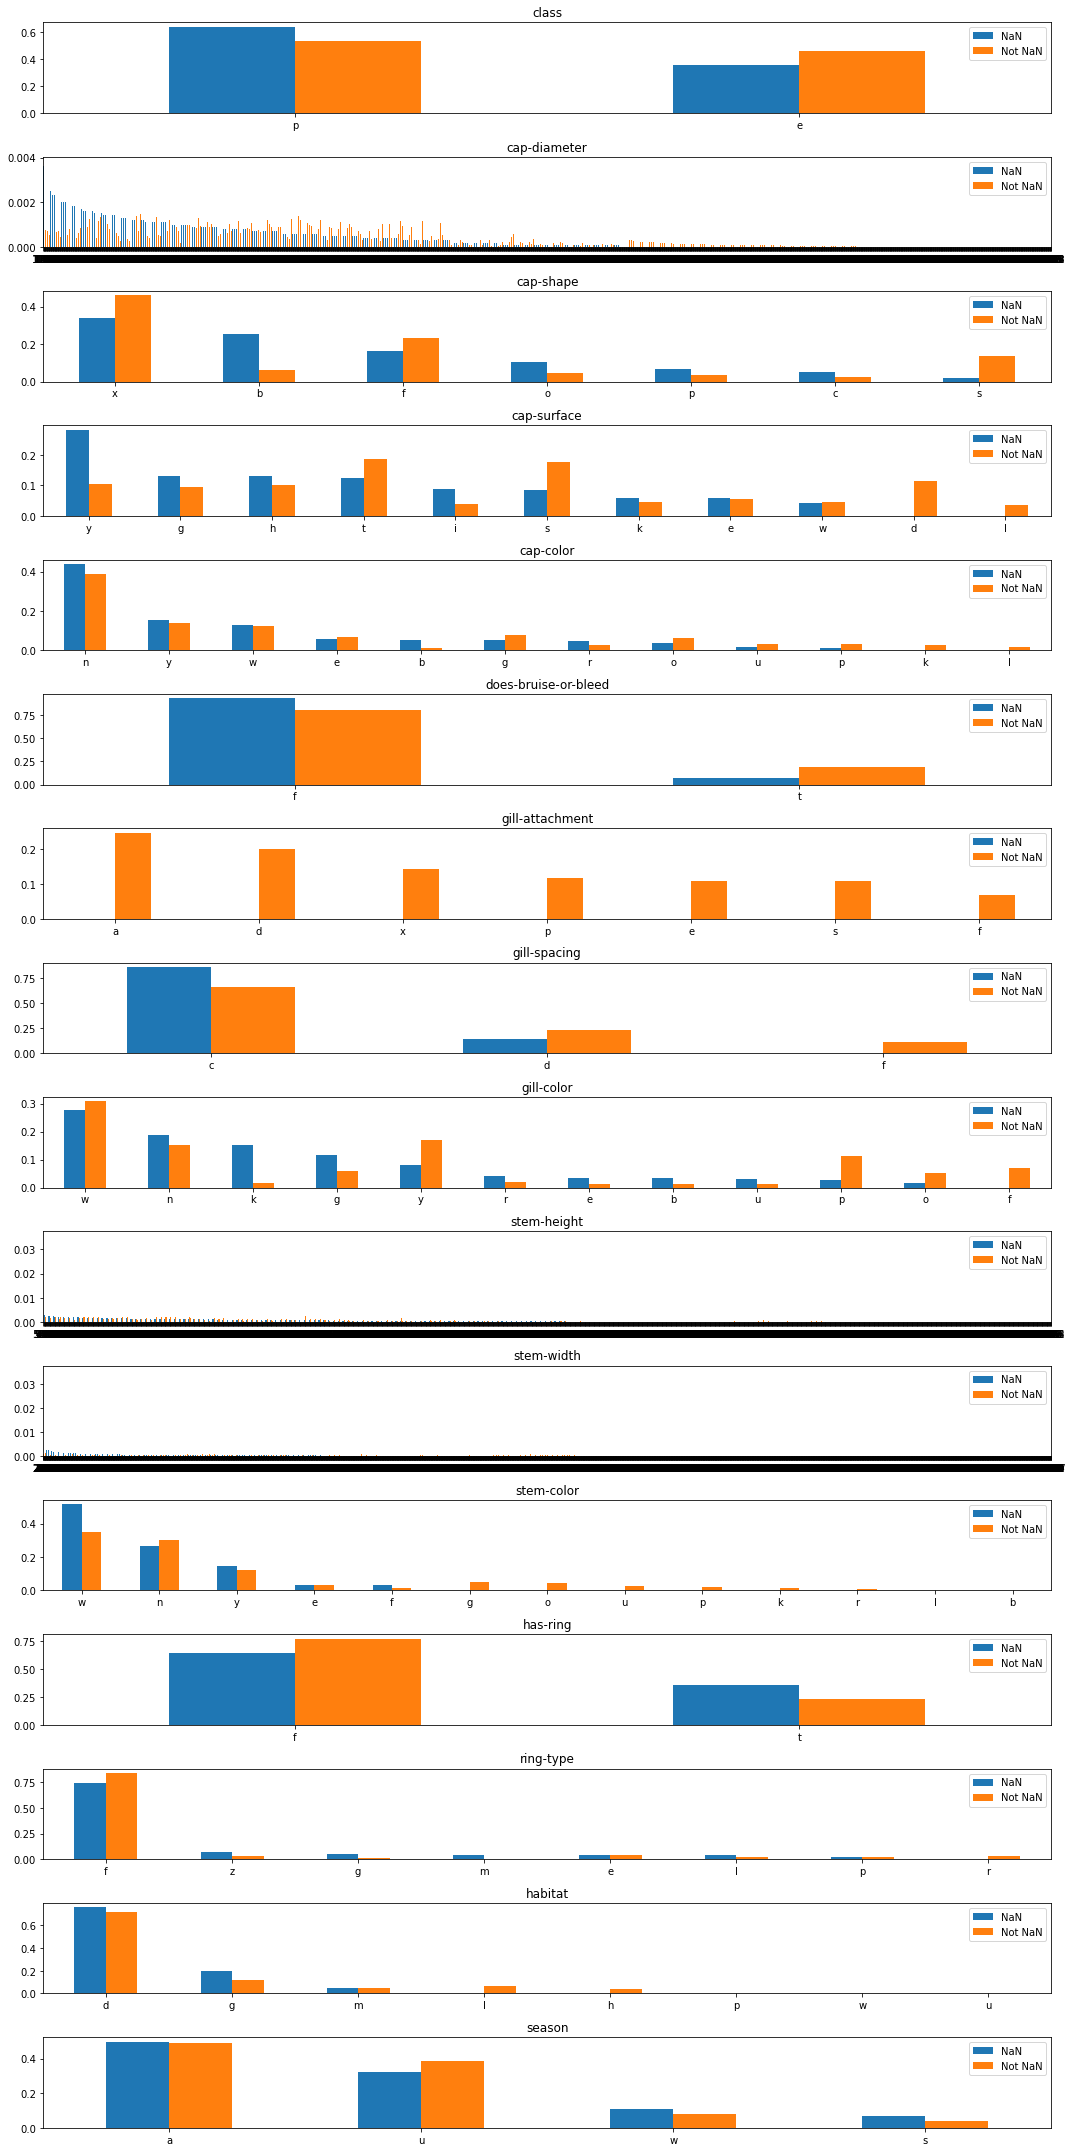

In [13]:
df_ga_na = df[df['gill-attachment'].isna()]
df_ga = df[~df['gill-attachment'].isna()]

def plot_normalized_value_counts(column, ax):
    value_counts_na = df_ga_na[column].value_counts(normalize=True)
    value_counts_ga = df_ga[column].value_counts(normalize=True)
    value_counts = pd.concat([value_counts_na, value_counts_ga], axis=1, keys=['NaN', 'Not NaN'])
    value_counts.plot(kind='bar', ax=ax, rot=0)
    ax.set_title(column)

fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 30
                                                                 ))

for i, col in enumerate(df.columns):
    plot_normalized_value_counts(col, axes[i])

plt.tight_layout()
plt.show()

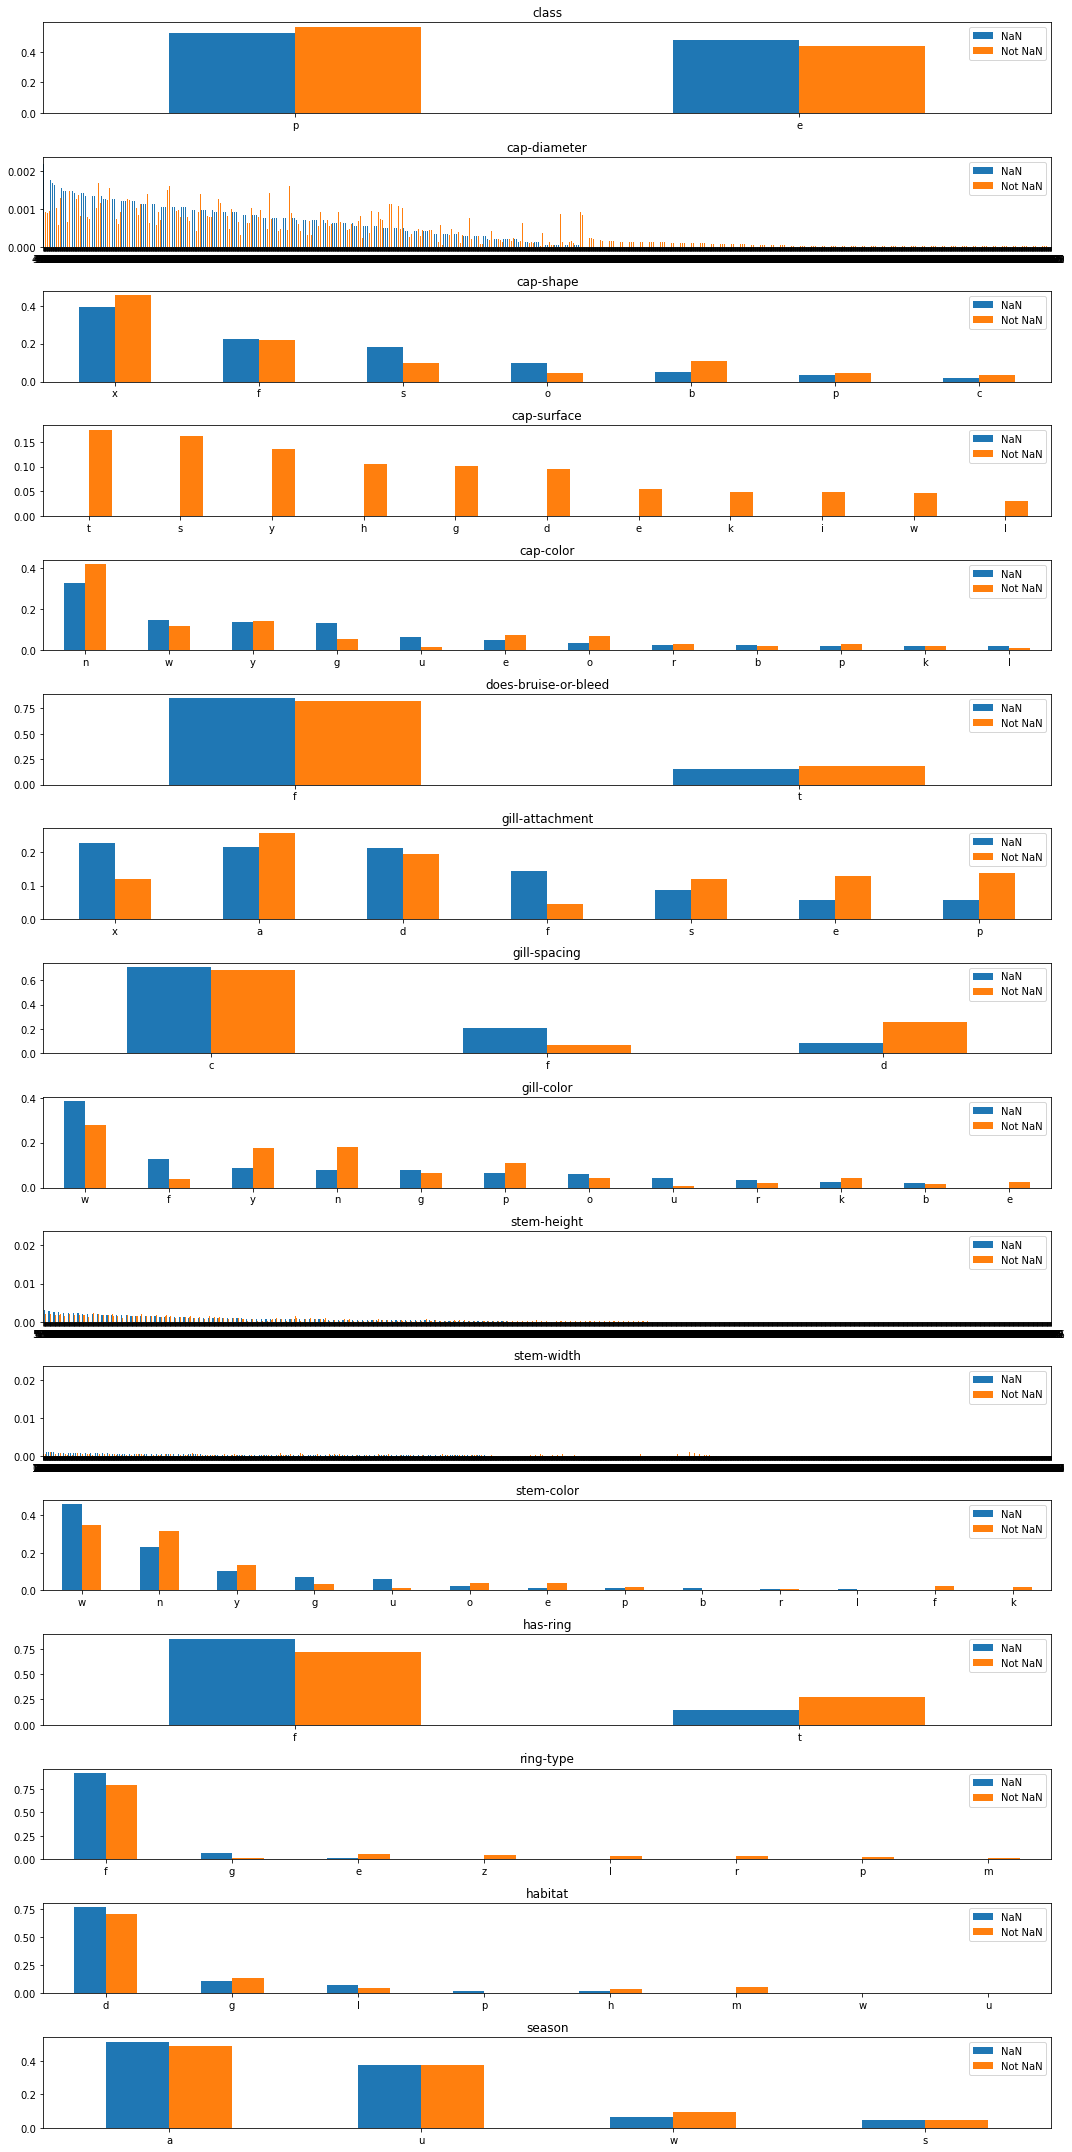

In [14]:
#cap-surface
df_cs_na = df[df['cap-surface'].isna()]
df_cs = df[~df['cap-surface'].isna()]

def plot_normalized_value_counts(column, ax):
    value_counts_na = df_cs_na[column].value_counts(normalize=True)
    value_counts_ga = df_cs[column].value_counts(normalize=True)
    value_counts = pd.concat([value_counts_na, value_counts_ga], axis=1, keys=['NaN', 'Not NaN'])
    value_counts.plot(kind='bar', ax=ax, rot=0)
    ax.set_title(column)

fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 30
                                                                 ))

for i, col in enumerate(df.columns):
    plot_normalized_value_counts(col, axes[i])

plt.tight_layout()
plt.show()

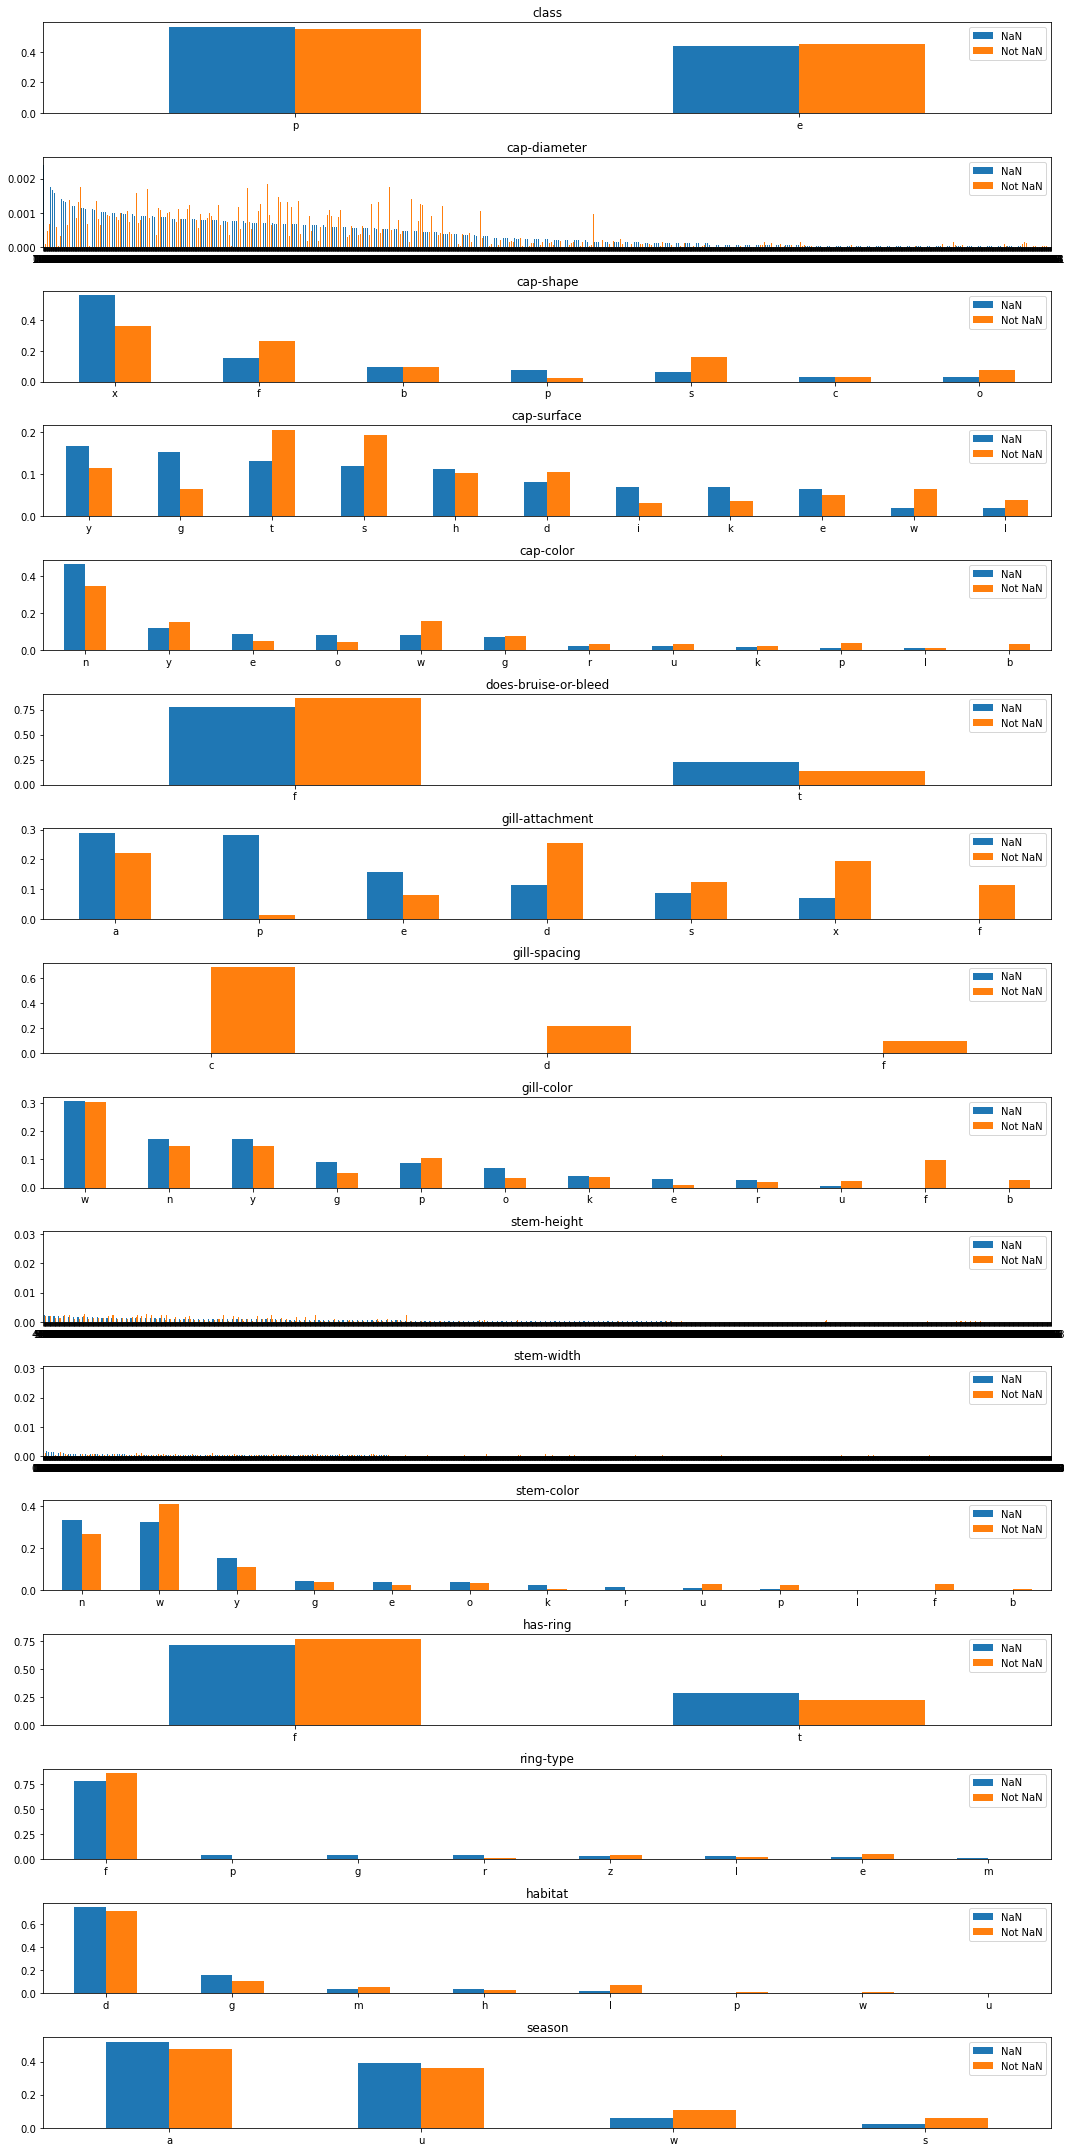

In [15]:
#gill-spacing
df_gs_na = df[df['gill-spacing'].isna()]
df_gs = df[~df['gill-spacing'].isna()]

def plot_normalized_value_counts(column, ax):
    value_counts_na = df_gs_na[column].value_counts(normalize=True)
    value_counts_ga = df_gs[column].value_counts(normalize=True)
    value_counts = pd.concat([value_counts_na, value_counts_ga], axis=1, keys=['NaN', 'Not NaN'])
    value_counts.plot(kind='bar', ax=ax, rot=0)
    ax.set_title(column)

fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 30
                                                                 ))

for i, col in enumerate(df.columns):
    plot_normalized_value_counts(col, axes[i])

plt.tight_layout()
plt.show()


# experimenting with plots for paper

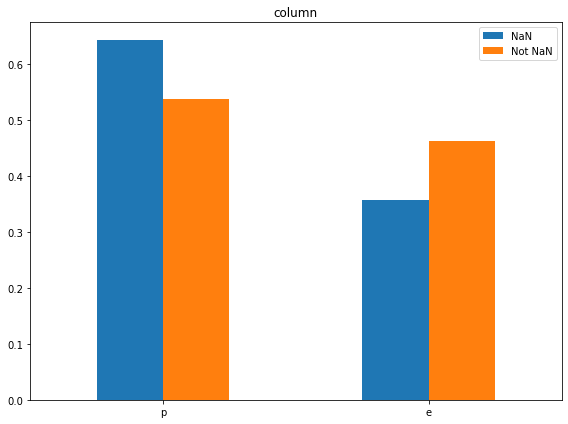

In [92]:
df_ga_na = df[df['gill-attachment'].isna()]
df_ga = df[~df['gill-attachment'].isna()]

def plot_normalized_value_counts(column, ax):
    value_counts_na = df_ga_na[column].value_counts(normalize=True)
    value_counts_ga = df_ga[column].value_counts(normalize=True)
    value_counts = pd.concat([value_counts_na, value_counts_ga], axis=1, keys=['NaN', 'Not NaN'])
    value_counts.plot(kind='bar', ax=ax, rot=0)
    ax.set_title('column')
    ax.set_xlabel(column)
    ax.set_ylabel('distribution')

fig, ax = plt.subplots(figsize=(8, 6))
plot_normalized_value_counts(df.columns[0], ax)
plt.tight_layout()
plt.show()

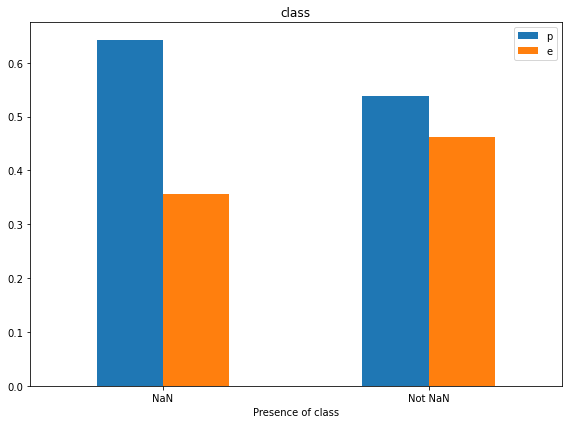

In [94]:
df_ga_na = df[df['gill-attachment'].isna()]
df_ga = df[~df['gill-attachment'].isna()]

def plot_normalized_value_counts(column, ax):
    value_counts_na = df_ga_na[column].value_counts(normalize=True)
    value_counts_ga = df_ga[column].value_counts(normalize=True)
    value_counts = pd.concat([value_counts_na, value_counts_ga], axis=1, keys=['NaN', 'Not NaN'])
    value_counts = value_counts.transpose()  # Transpose dataframe to swap x-axis
    value_counts.plot(kind='bar', ax=ax, rot=0)
    ax.set_title(column)
    ax.set_xlabel('Presence of ' + column)  # Update x-axis label

fig, ax = plt.subplots(figsize=(8, 6))
plot_normalized_value_counts(df.columns[0], ax)
plt.tight_layout()
plt.show()

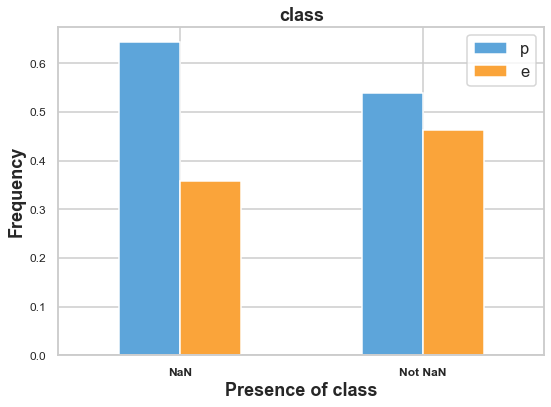

In [95]:

sns.set_style('whitegrid')
sns.set_context('talk')
df_ga_na = df[df['gill-attachment'].isna()]
df_ga = df[~df['gill-attachment'].isna()]

def plot_normalized_value_counts(column, ax):
    value_counts_na = df_ga_na[column].value_counts(normalize=True)
    value_counts_ga = df_ga[column].value_counts(normalize=True)
    value_counts = pd.concat([value_counts_na, value_counts_ga], axis=1, keys=['NaN', 'Not NaN'])
    value_counts = value_counts.transpose()
    value_counts.plot(kind='bar', ax=ax, rot=0, color=['#5DA5DA', '#FAA43A'])
    ax.set_title('Breakdown of Nan values in', fontweight='bold')
    ax.set_xlabel('Presence of ' + column, fontweight='bold')
    ax.set_ylabel('Frequency', fontweight='bold')
    ax.set_xticklabels(['NaN', 'Not NaN'], fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)
fig, ax = plt.subplots(figsize=(8, 6))
plot_normalized_value_counts(df.columns[0], ax)
plt.tight_layout()

plt.show()

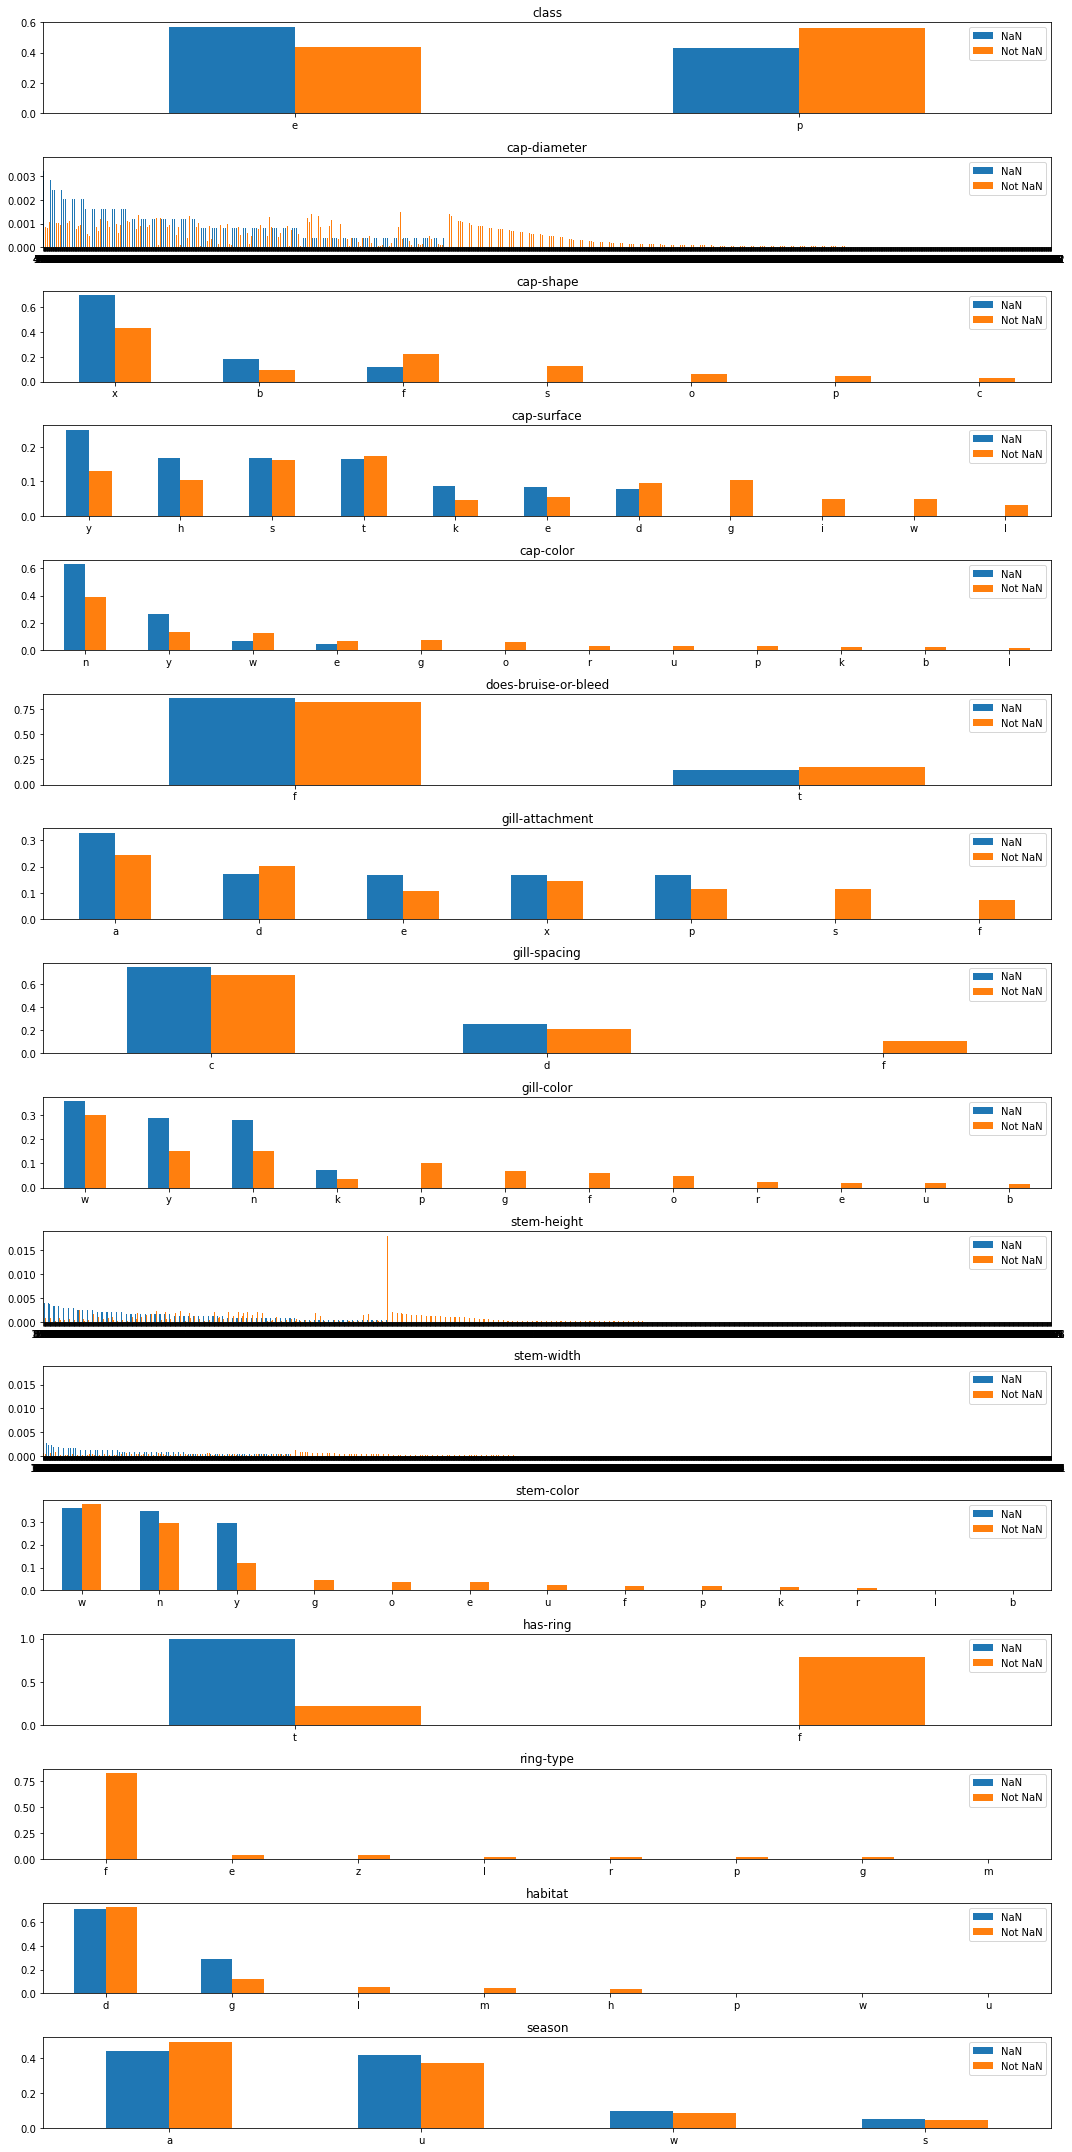

In [16]:
# ring-type
df_rt_na = df[df['ring-type'].isna()]
df_rt = df[~df['ring-type'].isna()]

def plot_normalized_value_counts(column, ax):
    value_counts_na = df_rt_na[column].value_counts(normalize=True)
    value_counts_ga = df_rt[column].value_counts(normalize=True)
    value_counts = pd.concat([value_counts_na, value_counts_ga], axis=1, keys=['NaN', 'Not NaN'])
    value_counts.plot(kind='bar', ax=ax, rot=0)
    ax.set_title(column)

fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 30
                                                                 ))

for i, col in enumerate(df.columns):
    plot_normalized_value_counts(col, axes[i])

plt.tight_layout()
plt.show()


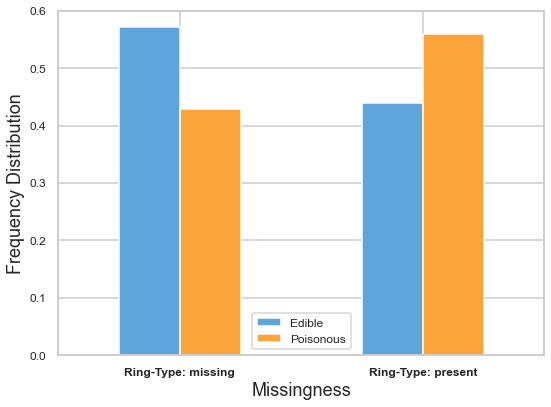

In [108]:
df_rt_na = df[df['ring-type'].isna()]
df_rt = df[~df['ring-type'].isna()]

def plot_normalized_value_counts(column, ax):
    value_counts_na = df_rt_na[column].value_counts(normalize=True)
    value_counts_ga = df_rt[column].value_counts(normalize=True)
    value_counts = pd.concat([value_counts_na, value_counts_ga], axis=1, keys=['NaN', 'Not NaN'])
    value_counts = value_counts.transpose()
    value_counts.plot(kind='bar', ax=ax, rot=0, color=['#5DA5DA', '#FAA43A'])
   # ax.set_title("Normalized Frequency Distribution of Missingness in the 'Ring-Type' Feature", fontweight='bold')
    ax.set_xlabel('Missingness')
    ax.set_ylabel('Frequency Distribution')
    ax.set_xticklabels(['Ring-Type: missing', 'Ring-Type: present'], fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(fontsize=12, labels=['Edible', 'Poisonous'])
fig, ax = plt.subplots(figsize=(8, 6))
plot_normalized_value_counts(df.columns[0], ax)
plt.tight_layout()
plt.show()

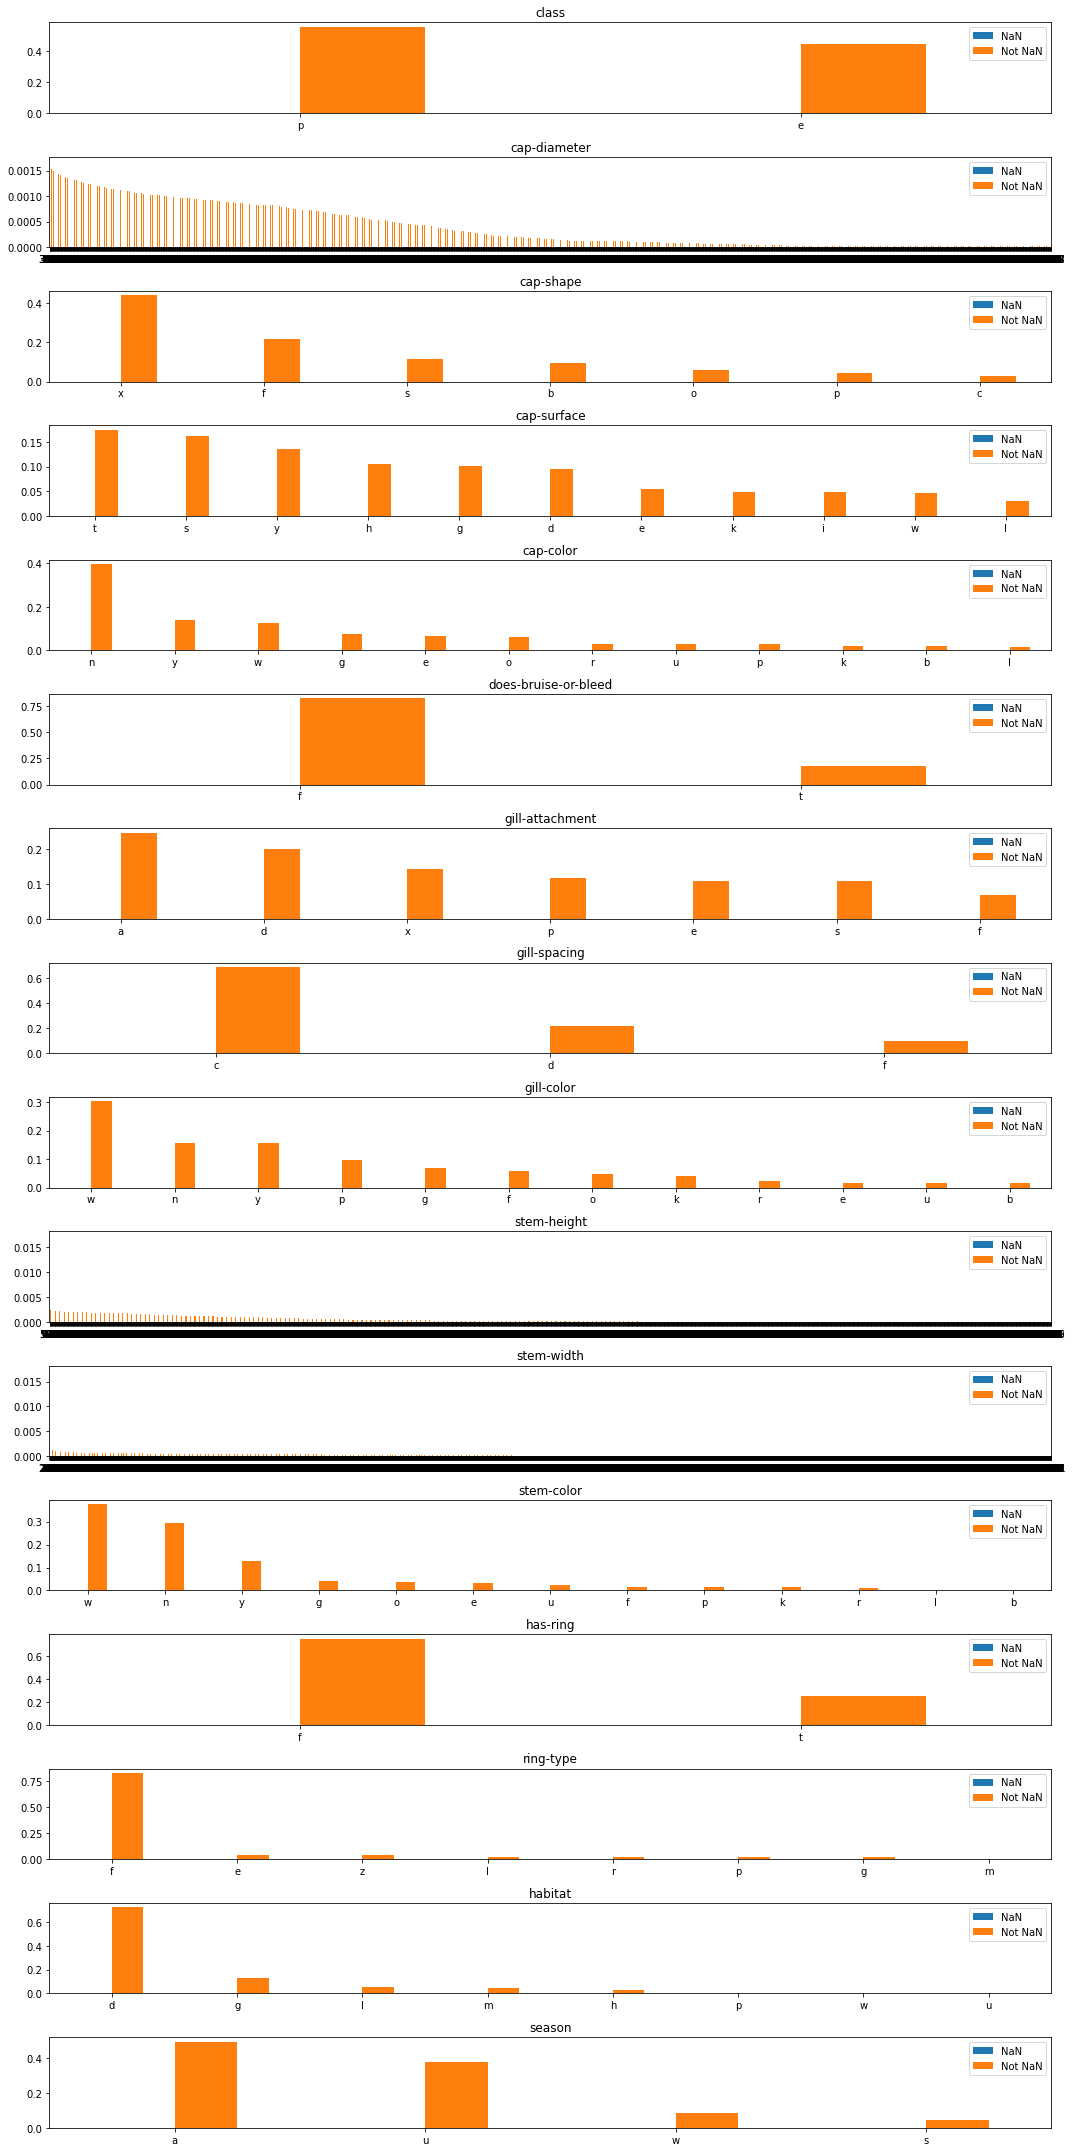

In [17]:
# does it have a ring
df_hr_na = df[df['has-ring'].isna()]
df_hr = df[~df['has-ring'].isna()]

def plot_normalized_value_counts(column, ax):
    value_counts_na = df_hr_na[column].value_counts(normalize=True)
    value_counts_ga = df_hr[column].value_counts(normalize=True)
    value_counts = pd.concat([value_counts_na, value_counts_ga], axis=1, keys=['NaN', 'Not NaN'])
    value_counts.plot(kind='bar', ax=ax, rot=0)
    ax.set_title(column)

fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 30
                                                                 ))

for i, col in enumerate(df.columns):
    plot_normalized_value_counts(col, axes[i])

plt.tight_layout()
plt.show()

In [18]:
nan_counts = df.isna().sum()
nan_counts/len(df)

class                   0.000000
cap-diameter            0.000000
cap-shape               0.000000
cap-surface             0.231214
cap-color               0.000000
does-bruise-or-bleed    0.000000
gill-attachment         0.161850
gill-spacing            0.410405
gill-color              0.000000
stem-height             0.000000
stem-width              0.000000
stem-color              0.000000
has-ring                0.000000
ring-type               0.040462
habitat                 0.000000
season                  0.000000
dtype: float64

Decided to drop all columns with missing information except for ring-type

In [109]:
df = df.drop(['gill-spacing', 'gill-attachment', 'cap-surface'], axis = 1)

In [110]:
## Changing our tagret variable 'class' into a binary variable. poisonous mushroom= 1
df['class'] = df['class'].replace({'p': 1, 'e': 0})
sum(df['class'])/len(df['class'])

0.5549132947976878

In [111]:
## Easy ones (transforming binary variables)
df['has-ring'] = df['has-ring'].replace({'t': 1, 'f': 0})
df['does-bruise-or-bleed'] = df['does-bruise-or-bleed'].replace({'t': 1, 'f': 0})

In [112]:
### getting more challenging

## one hot encoding seasonal information 
df = pd.get_dummies(df, columns=['season'])


In [113]:
## one hot encoding  habitat

df = pd.get_dummies(df, columns = ['habitat'])

In [114]:
### more one hot encoding (the rest of the variables)

df = pd.get_dummies(df, columns = ['cap-shape'])
df = pd.get_dummies(df, columns = ['cap-color'])
df = pd.get_dummies(df, columns = ['gill-color'])
df = pd.get_dummies(df, columns = ['stem-color'])
df = pd.get_dummies(df, columns = ['ring-type'])

In [115]:
## drop redundant column 

df = df.drop(['ring-type_f'], axis = 1)

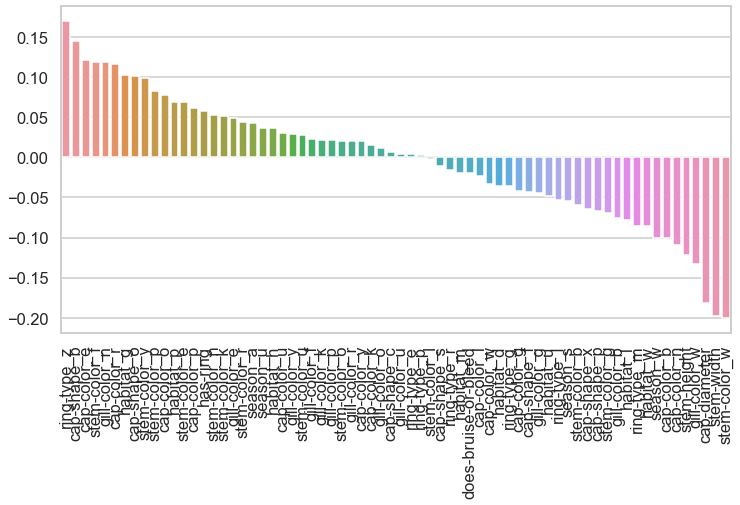

In [116]:
corr_ = df.corr()
correlations = corr_['class'].drop('class')
sorted_correlations = correlations.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values, ax=ax)
plt.xticks(rotation=90)

plt.show()

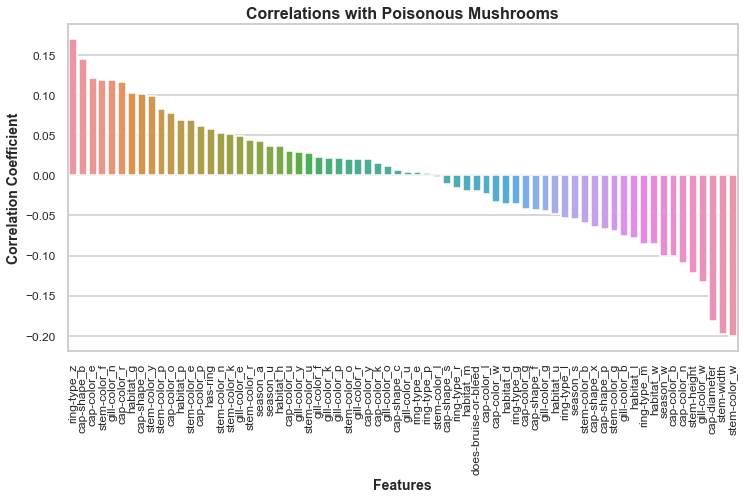

In [121]:
corr_ = df.corr()
correlations = corr_['class'].drop('class')
sorted_correlations = correlations.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values, ax=ax)
ax.set_title('Correlations with Poisonous Mushrooms', fontweight='bold', fontsize=16)
ax.set_xlabel('Features', fontweight='bold', fontsize=14)
ax.set_ylabel('Correlation Coefficient', fontweight='bold', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=90)

plt.show()

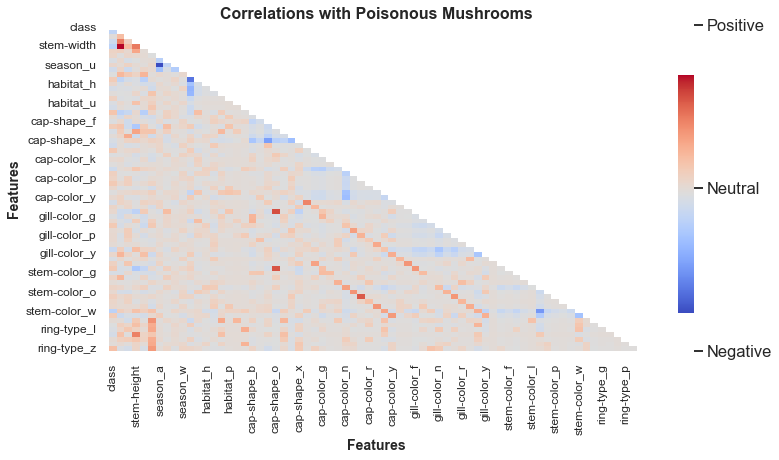

In [124]:
corr_ = df.corr()
correlations = corr_['class'].drop('class')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr_, mask=np.triu(np.ones_like(corr_, dtype=bool)), cmap="coolwarm", annot=False)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1, 0, 1])
cbar.set_ticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_title('Correlations with Poisonous Mushrooms', fontweight='bold', fontsize=16)
ax.set_xlabel('Features', fontweight='bold', fontsize=14)
ax.set_ylabel('Features', fontweight='bold', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=90)

plt.show()

In [126]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corr_upper = corr.where(mask)
corr_upper = corr_upper.stack().reset_index()
corr_upper.columns = ['Feature 1', 'Feature 2', 'Correlation']
corr_upper = corr_upper.loc[corr_upper['Feature 1'] != corr_upper['Feature 2']]
corr_upper = corr_upper.sort_values('Correlation', ascending=False)
corr_top = corr_upper.head(10)

colinear_features = [(row['Feature 1'], row['Feature 2']) for index, row in corr_top.iterrows()]

print(colinear_features)

[('cap-diameter', 'stem-width'), ('cap-shape_o', 'gill-color_f'), ('cap-shape_o', 'stem-color_f'), ('cap-color_p', 'stem-color_p'), ('stem-height', 'stem-width'), ('cap-diameter', 'stem-height'), ('stem-height', 'ring-type_m'), ('cap-color_b', 'gill-color_b'), ('has-ring', 'ring-type_e'), ('cap-color_o', 'stem-color_o')]


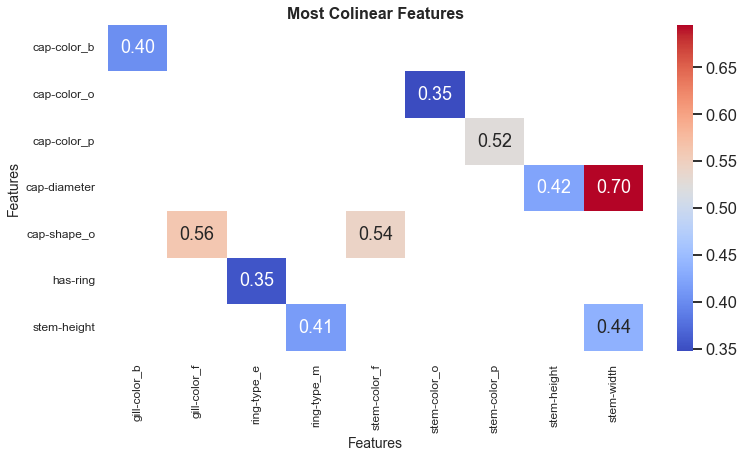

In [128]:


fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr_top.pivot('Feature 1', 'Feature 2', 'Correlation'), cmap="coolwarm", annot=True, fmt=".2f")
ax.set_title('Most Colinear Features', fontweight='bold', fontsize=16)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Features', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=90)

plt.show()

In [131]:
df = df.drop('stem-width', axis = 1)

In [27]:
###cehcking unique values for categorical variables.
counts = df.nunique()
pd.set_option('display.max_rows', None)
counts

class                      2
cap-diameter            2571
does-bruise-or-bleed       2
stem-height             2226
stem-width              4630
has-ring                   2
season_a                   2
season_s                   2
season_u                   2
season_w                   2
habitat_d                  2
habitat_g                  2
habitat_h                  2
habitat_l                  2
habitat_m                  2
habitat_p                  2
habitat_u                  2
habitat_w                  2
cap-shape_b                2
cap-shape_c                2
cap-shape_f                2
cap-shape_o                2
cap-shape_p                2
cap-shape_s                2
cap-shape_x                2
cap-color_b                2
cap-color_e                2
cap-color_g                2
cap-color_k                2
cap-color_l                2
cap-color_n                2
cap-color_o                2
cap-color_p                2
cap-color_r                2
cap-color_u   

(0.0, 25.0)

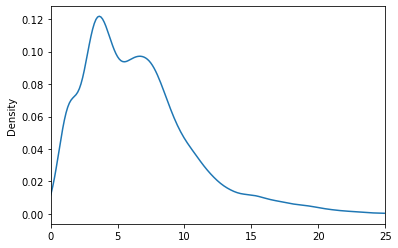

In [28]:
df['cap-diameter'].plot.kde()
plt.xlim(0, 25)

(0.0, 30.0)

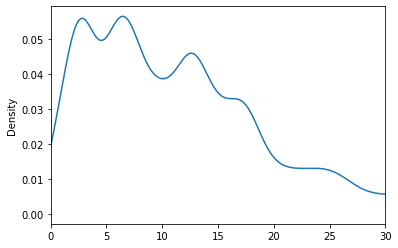

In [29]:
#df['stem-width'].plot.kde()
#plt.xlim(0, 30)

(0.0, 15.0)

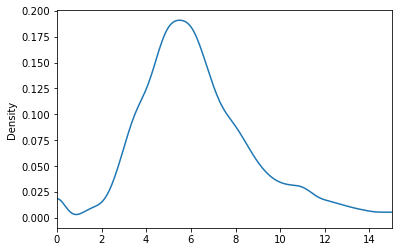

In [30]:
df['stem-height'].plot.kde()
plt.xlim(0, 15)

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\50061866.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax1 = sns.kdeplot(df['stem-height'], shade=True, ax=ax1)
C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\50061866.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax2 = sns.kdeplot(df['cap-diameter'], shade=True, ax=ax2)


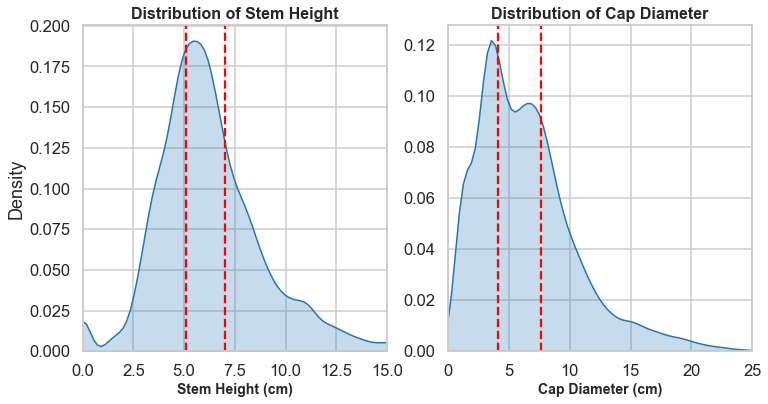

In [158]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for stem-height
ax1 = sns.kdeplot(df['stem-height'], shade=True, ax=ax1)
ax1.set_xlim(0, 15)
ax1.set_xlabel('Stem Height (cm)', fontsize=14, fontweight='bold')

# Add vertical lines
ax1.axvline(df['stem-height'].quantile(0.33), color='red', linestyle='--')
ax1.axvline(df['stem-height'].quantile(0.67), color='red', linestyle='--')

# Plot for cap-diameter
ax2 = sns.kdeplot(df['cap-diameter'], shade=True, ax=ax2)
ax2.set_xlim(0, 25)
ax2.set_xlabel('Cap Diameter (cm)', fontsize=14, fontweight='bold')
ax2.set_ylabel(None)

# Add vertical lines
ax2.axvline(df['cap-diameter'].quantile(0.33), color='red', linestyle='--')
ax2.axvline(df['cap-diameter'].quantile(0.67), color='red', linestyle='--')

# Set titles
ax1.set_title('Distribution of Stem Height', fontsize=16, fontweight='bold')
ax2.set_title('Distribution of Cap Diameter', fontsize=16, fontweight='bold')

plt.show()


In [156]:
df.tail()

,class,cap-diameter,does-bruise-or-bleed,stem-height,has-ring,season_a,season_s,season_u,season_w,habitat_d,...,stem-color_u,stem-color_w,stem-color_y,ring-type_e,ring-type_g,ring-type_l,ring-type_m,ring-type_p,ring-type_r,ring-type_z
61064,1,1.18,0,3.93,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
61065,1,1.27,0,3.18,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
61066,1,1.27,0,3.86,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
61067,1,1.24,0,3.56,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
61068,1,1.17,0,3.25,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


# Encoding continous variables

In [159]:
df['cap-diameter_1'] = df['cap-diameter'].apply(lambda x: 'Small' if x <= 5 else 'Large' if x >= 7.5 else 'Medium')

In [32]:
#df['stem-width_1'] = df['stem-width'].apply(lambda x: 'Small' if x <= 5 else 'Large' if x >= 15 else 'Medium')

In [160]:
df['stem-height'] = df['stem-height'].apply(lambda x: 'Small' if x <= 5 else 'Large' if x >= 7.5 else 'Medium')

In [163]:
df = pd.get_dummies(df, columns = ['cap-diameter_1'])
#df = pd.get_dummies(df, columns = ['stem-width_1'])
df = pd.get_dummies(df, columns = ['stem-height'])


In [165]:
df = df.drop(['cap-diameter'], axis = 1)

In [166]:
counts = df.nunique()
pd.set_option('display.max_rows', None)
counts

class                    2
does-bruise-or-bleed     2
has-ring                 2
season_a                 2
season_s                 2
season_u                 2
season_w                 2
habitat_d                2
habitat_g                2
habitat_h                2
habitat_l                2
habitat_m                2
habitat_p                2
habitat_u                2
habitat_w                2
cap-shape_b              2
cap-shape_c              2
cap-shape_f              2
cap-shape_o              2
cap-shape_p              2
cap-shape_s              2
cap-shape_x              2
cap-color_b              2
cap-color_e              2
cap-color_g              2
cap-color_k              2
cap-color_l              2
cap-color_n              2
cap-color_o              2
cap-color_p              2
cap-color_r              2
cap-color_u              2
cap-color_w              2
cap-color_y              2
gill-color_b             2
gill-color_e             2
gill-color_f             2
g

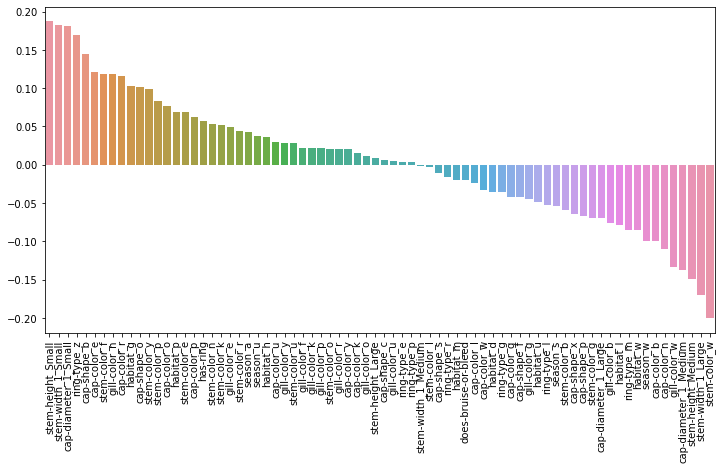

In [37]:
corr_ = df.corr()
correlations = corr_['class'].drop('class')
sorted_correlations = correlations.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values, ax=ax)
plt.xticks(rotation=90)

plt.show()

# Train and test sets


In [132]:
X = df.drop('class', axis=1)
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
print(X_train)
print(X_test)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [134]:
svc = SVC(kernel='linear', C=1, gamma='scale')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7402980186671033


# Log regression

In [135]:
t1 = datetime.datetime.now()

lr = LogisticRegression(random_state=42)
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(scores)
print(format(np.mean(scores)))
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred)
t2 = datetime.datetime.now()

print(accuracy_log)
print(t2-t1)

C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.74721113 0.73974005 0.73851192 0.74741582 0.75191894]
0.7449595742503327
0.748730964467005
0:00:02.930198


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [153]:
df.tail()

,class,cap-diameter,does-bruise-or-bleed,stem-height,has-ring,season_a,season_s,season_u,season_w,habitat_d,...,stem-color_u,stem-color_w,stem-color_y,ring-type_e,ring-type_g,ring-type_l,ring-type_m,ring-type_p,ring-type_r,ring-type_z
61064,1,1.18,0,3.93,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
61065,1,1.27,0,3.18,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
61066,1,1.27,0,3.86,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
61067,1,1.24,0,3.56,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
61068,1,1.17,0,3.25,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


# KNN


In [136]:
## do not rerun
t1 = datetime.datetime.now()
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
t2 = datetime.datetime.now()
print(t2-t1)
print(accuracy_knn)
print(scores)

0:00:42.346631
0.9877190109710169
[0.98505782 0.98464845 0.98505782 0.98516017 0.98485314]


In [152]:
dff = pd.DataFrame({
    '': ['KNN', 'Logistic Regression', 'SVC'],
    'Accuracy': ['98.7%', '74.8%', '74.0%'],
    'Execution Time': ['42.2s', '2.9s', '7m 36s']
})

styled_df = dff.style.set_properties(**{'text-align': 'center', 'font-size': '16px'}) \
                    .set_caption("<div style='text-align: center; font-weight: bold;'>Model Performance</div>") \
                    .set_table_styles([{'selector': 'caption',
                                        'props': [('font-size', '18px'), ('font-weight', 'bold')]}]) \
                    .set_precision(2) \
                    .set_table_attributes('style="border-collapse: collapse; border: 1px solid black; font-size: 14px; margin-bottom: 10px; margin-left: auto; margin-right: auto;"') \
                    .hide_index() \
                    .set_properties(**{'text-align': 'center'}, subset=pd.IndexSlice[0, ''])

styled_df

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\2630908874.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  styled_df = dff.style.set_properties(**{'text-align': 'center', 'font-size': '16px'}) \
C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\2630908874.py:7: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  styled_df = dff.style.set_properties(**{'text-align': 'center', 'font-size': '16px'}) \


,Accuracy,Execution Time
KNN,98.7%,42.2s
Logistic Regression,74.8%,2.9s
SVC,74.0%,7m 36s


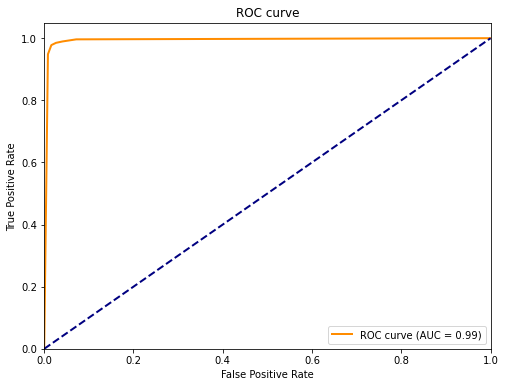

In [43]:
### do not rerun

y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# edited KNN

In [167]:
t1 = datetime.datetime.now()
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
t2 = datetime.datetime.now()
print(t2-t1)
print(accuracy)
print(scores)

0:00:44.026455
0.9877190109710169
[0.98505782 0.98464845 0.98505782 0.98516017 0.98485314]


In [173]:
t1 = datetime.datetime.now()
knn = KNeighborsClassifier(n_neighbors=11, weights = 'distance', metric='euclidean')
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
t2 = datetime.datetime.now()
print(t2-t1)
print(accuracy)
print(scores)

0:00:45.821124
0.9859996725069592
[0.98444376 0.98331798 0.98096408 0.98290861 0.98393204]


[[5281   93]
 [  78 6762]]


<AxesSubplot:>

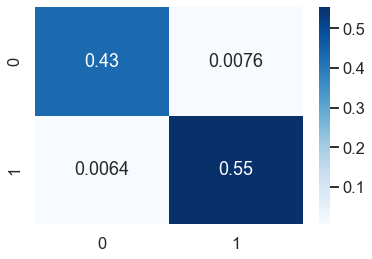

In [174]:
cm_knn1 = confusion_matrix(y_test, y_pred)
print(cm_knn1)

sns.heatmap(cm_knn1/len(y_test), annot=True, cmap='Blues')

In [45]:
## confusion matix
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)

[[5232  142]
 [ 103 6737]]


<AxesSubplot:>

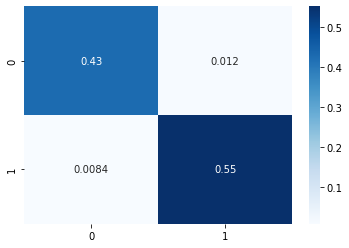

In [46]:
sns.heatmap(cm_knn/len(y_test), annot=True, cmap='Blues')

In [168]:
dff = pd.DataFrame({
    '': ['KNN baseline', 'new KNN'],
    'Accuracy': ['98.7%', '97.9%'],
    'Execution Time': ['42.2s', '41.1s']
})

styled_df = dff.style.set_properties(**{'text-align': 'center', 'font-size': '16px'}) \
                    .set_caption("<div style='text-align: center; font-weight: bold;'>Model Performance</div>") \
                    .set_table_styles([{'selector': 'caption',
                                        'props': [('font-size', '18px'), ('font-weight', 'bold')]}]) \
                    .set_precision(2) \
                    .set_table_attributes('style="border-collapse: collapse; border: 1px solid black; font-size: 14px; margin-bottom: 10px; margin-left: auto; margin-right: auto;"') \
                    .hide_index() \
                    .set_properties(**{'text-align': 'center'}, subset=pd.IndexSlice[0, ''])

styled_df

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\771244010.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  styled_df = dff.style.set_properties(**{'text-align': 'center', 'font-size': '16px'}) \
C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\771244010.py:7: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  styled_df = dff.style.set_properties(**{'text-align': 'center', 'font-size': '16px'}) \


,Accuracy,Execution Time
KNN baseline,98.7%,42.2s
new KNN,97.9%,41.1s


In [180]:
dff = pd.DataFrame({
    '': ['stacked KNN', 'tuned KNN'],
    'Accuracy': ['98.7%', '98.5%'],
    'Execution Time': ['33.3s', '39.9s']
})

styled_df = dff.style.set_properties(**{'text-align': 'center', 'font-size': '16px'}) \
                    .set_caption("<div style='text-align: center; font-weight: bold;'>Model Performance</div>") \
                    .set_table_styles([{'selector': 'caption',
                                        'props': [('font-size', '18px'), ('font-weight', 'bold')]}]) \
                    .set_precision(2) \
                    .set_table_attributes('style="border-collapse: collapse; border: 1px solid black; font-size: 14px; margin-bottom: 10px; margin-left: auto; margin-right: auto;"') \
                    .hide_index() \
                    .set_properties(**{'text-align': 'center'}, subset=pd.IndexSlice[0, ''])

styled_df

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\2228121723.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  styled_df = dff.style.set_properties(**{'text-align': 'center', 'font-size': '16px'}) \
C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\2228121723.py:7: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  styled_df = dff.style.set_properties(**{'text-align': 'center', 'font-size': '16px'}) \


,Accuracy,Execution Time
stacked KNN,98.7%,33.3s
tuned KNN,98.5%,39.9s


Text(0, 0.5, 'Feature')

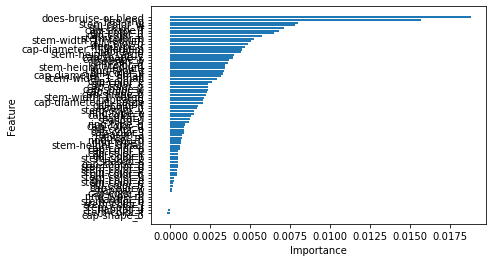

In [65]:
result = permutation_importance(knn, X_test, y_test, n_repeats=1, random_state=0)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
importance_df = importance_df.sort_values('Importance')
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')

Text(0, 0.5, 'Feature')

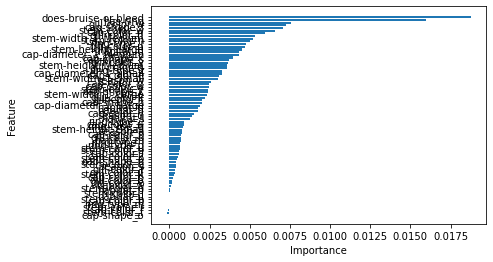

In [66]:
result1 = permutation_importance(knn, X_test, y_test, n_repeats=5, random_state=0)
importance_df1 = pd.DataFrame({'Feature': X.columns, 'Importance': result1.importances_mean})
importance_df1 = importance_df1.sort_values('Importance')
plt.barh(importance_df1['Feature'], importance_df1['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')

In [69]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13],
              'weights': ['uniform', 'distance']}

knn = KNeighborsClassifier(metric='euclidean')
grid_search = GridSearchCV(knn, param_grid, cv=5)
gs_result = grid_search.fit(X_train, y_train)
gs_result

GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']})

In [71]:
gs_result.best_params_

{'n_neighbors': 11, 'weights': 'distance'}

In [73]:
cv_results = grid_search.cv_results_
sorted_results = sorted(list(zip(cv_results['params'], cv_results['mean_test_score'])), key=lambda x: x[1], reverse=True)
for i, (params, mean_test_score) in enumerate(sorted_results):
    print(f"Rank {i+1}: {params} with mean test score of {mean_test_score}")

Rank 1: {'n_neighbors': 11, 'weights': 'distance'} with mean test score of 0.9826629822945451
Rank 2: {'n_neighbors': 13, 'weights': 'distance'} with mean test score of 0.9824173574864394
Rank 3: {'n_neighbors': 7, 'weights': 'distance'} with mean test score of 0.9822126701463514
Rank 4: {'n_neighbors': 9, 'weights': 'distance'} with mean test score of 0.9821922014123426
Rank 5: {'n_neighbors': 5, 'weights': 'distance'} with mean test score of 0.9821103264763075
Rank 6: {'n_neighbors': 3, 'weights': 'distance'} with mean test score of 0.9792242349810664
Rank 7: {'n_neighbors': 5, 'weights': 'uniform'} with mean test score of 0.9782212670146351
Rank 8: {'n_neighbors': 3, 'weights': 'uniform'} with mean test score of 0.9770136117081158
Rank 9: {'n_neighbors': 7, 'weights': 'uniform'} with mean test score of 0.976174393613755
Rank 10: {'n_neighbors': 9, 'weights': 'uniform'} with mean test score of 0.9749258008392181
Rank 11: {'n_neighbors': 11, 'weights': 'uniform'} with mean test score 

# bagged classifier

In [49]:
ensemble = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42)
ensemble.fit(X_train, y_train)
accuracy = ensemble.score(X_test, y_test)

In [50]:
accuracy

0.9807597838545931

# Boosted Classifier 

In [60]:
base_estimator = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(X_train, y_train)
boost_accuracy = adaboost.score(X_test, y_test)

ValueError: KNeighborsClassifier doesn't support sample_weight.

In [63]:
base_models = [('knn1', KNeighborsClassifier(n_neighbors=5)),
               ('knn2', KNeighborsClassifier(n_neighbors=10)),
               ('knn3', KNeighborsClassifier(n_neighbors=15))]


meta_model = LogisticRegression()
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_model)
for name, model in base_models:
    model.fit(X_train, y_train)
base_predictions = np.column_stack([model.predict_proba(X_test)[:,1] for name, model in base_models])
meta_model.fit(base_predictions, y_test)
stacking_predictions = meta_model.predict(base_predictions)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)

In [64]:
stacking_accuracy

0.9801047977730474

# Stacking model after tuning

In [178]:
t1 = datetime.datetime.now()

base_models = [('knn1', KNeighborsClassifier(n_neighbors=11, weights = 'distance')),
               ('knn2', KNeighborsClassifier(n_neighbors=13, weights = 'distance')),
               ('knn3', KNeighborsClassifier(n_neighbors=7, weights = 'distance'))]

meta_model = LogisticRegression()
stacking = StackingClassifier(estimators=base_models, final_estimator=meta_model)
for name, model in base_models:
    model.fit(X_train, y_train)
base_predictions = np.column_stack([model.predict_proba(X_test)[:,1] for name, model in base_models])
meta_model.fit(base_predictions, y_test)

t2 = datetime.datetime.now()
print(t2-t1)
stacking_predictions = meta_model.predict(base_predictions)
stacking_accuracy_hp1 = accuracy_score(y_test, stacking_predictions)

0:00:33.234010


In [232]:
threshold = .005

stacking_predictions = np.where(meta_model.predict_proba(base_predictions)[:,1] >= threshold, 1, 0)

# Calculate stacking accuracy
stacking_accuracy_hp1 = accuracy_score(y_test, stacking_predictions)
stacking_accuracy_hp1

0.9449811691501555

[[4707  667]
 [   5 6835]]


<AxesSubplot:>

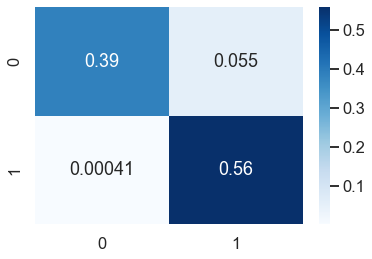

In [231]:
cm_hp  = confusion_matrix(y_test, stacking_predictions)
print(cm_hp)
sns.heatmap(cm_hp/len(y_test), annot=True, cmap='Blues')

In [75]:
stacking_accuracy_hp

0.9833797281807761

In [195]:
stacking_accuracy_hp1

0.9861634190273457

In [172]:
cm_hp  = confusion_matrix(y_test, stacking_predictions)
print(cm_hp)

[[5291   83]
 [  77 6763]]


<AxesSubplot:>

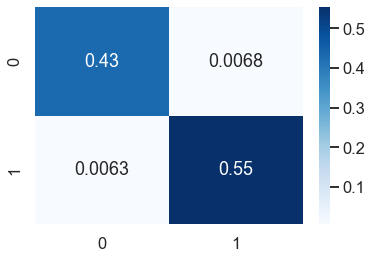

In [176]:
sns.heatmap(cm_hp/len(y_test), annot=True, cmap='Blues')

In [82]:
stacking_predictions


array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [181]:
df.tail()

,class,does-bruise-or-bleed,has-ring,season_a,season_s,season_u,season_w,habitat_d,habitat_g,habitat_h,...,ring-type_m,ring-type_p,ring-type_r,ring-type_z,cap-diameter_1_Large,cap-diameter_1_Medium,cap-diameter_1_Small,stem-height_Large,stem-height_Medium,stem-height_Small
61064,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
61065,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
61066,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
61067,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
61068,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [182]:
df_empty = df.copy()
df_empty = df_empty.drop(df_empty.index)

In [188]:
df_empty['class'][0] = 1

C:\Users\Chris\AppData\Local\Temp\ipykernel_22620\1369103604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empty['class'][0] = 1


In [190]:
df_empty.append()

TypeError: append() missing 1 required positional argument: 'other'

In [192]:
pd.set_option('display.max_columns', None)
df.tail()

,class,does-bruise-or-bleed,has-ring,season_a,season_s,season_u,season_w,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-color_b,cap-color_e,cap-color_g,cap-color_k,cap-color_l,cap-color_n,cap-color_o,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,gill-color_b,gill-color_e,gill-color_f,gill-color_g,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stem-color_b,stem-color_e,stem-color_f,stem-color_g,stem-color_k,stem-color_l,stem-color_n,stem-color_o,stem-color_p,stem-color_r,stem-color_u,stem-color_w,stem-color_y,ring-type_e,ring-type_g,ring-type_l,ring-type_m,ring-type_p,ring-type_r,ring-type_z,cap-diameter_1_Large,cap-diameter_1_Medium,cap-diameter_1_Small,stem-height_Large,stem-height_Medium,stem-height_Small
61064,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
61065,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
61066,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
61067,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
61068,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [244]:
X_train.tail()

,cap-diameter,does-bruise-or-bleed,stem-height,has-ring,season_a,season_s,season_u,season_w,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-color_b,cap-color_e,cap-color_g,cap-color_k,cap-color_l,cap-color_n,cap-color_o,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,gill-color_b,gill-color_e,gill-color_f,gill-color_g,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stem-color_b,stem-color_e,stem-color_f,stem-color_g,stem-color_k,stem-color_l,stem-color_n,stem-color_o,stem-color_p,stem-color_r,stem-color_u,stem-color_w,stem-color_y,ring-type_e,ring-type_g,ring-type_l,ring-type_m,ring-type_p,ring-type_r,ring-type_z
54343,5.52,0,2.47,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
38158,7.68,0,11.95,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
860,12.28,0,10.79,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
15795,6.78,1,6.43,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
56422,7.12,0,1.61,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [193]:
counts = df.nunique()
pd.set_option('display.max_rows', None)
countsdoes-bruise-or-bleed
has-ring
season_a
season_s
season_u
season_w
habitat_d
habitat_g
habitat_h
habitat_l
habitat_m
habitat_p
habitat_u
habitat_w
cap-shape_b
cap-shape_c
cap-shape_f
cap-shape_o
cap-shape_p
cap-shape_s
cap-shape_x
cap-color_b
cap-color_e
cap-color_g
cap-color_k
cap-color_l
cap-color_n
cap-color_o
cap-color_p
cap-color_r
cap-color_u
cap-color_w
cap-color_y
gill-color_b
gill-color_e
gill-color_f
gill-color_g
gill-color_k
gill-color_n
gill-color_o
gill-color_p
gill-color_r
gill-color_u
gill-color_w
gill-color_y
stem-color_b
stem-color_e
stem-color_f
stem-color_g
stem-color_k
stem-color_l
stem-color_n
stem-color_o
stem-color_p
stem-color_r
stem-color_u
stem-color_w
stem-color_y
ring-type_e
ring-type_g
ring-type_l
ring-type_m
ring-type_p
ring-type_r
ring-type_z
cap-diameter_1_Large
cap-diameter_1_Medium
cap-diameter_1_Small
stem-height_Large
stem-height_Medium
stem-height_Small

class                    2
does-bruise-or-bleed     2
has-ring                 2
season_a                 2
season_s                 2
season_u                 2
season_w                 2
habitat_d                2
habitat_g                2
habitat_h                2
habitat_l                2
habitat_m                2
habitat_p                2
habitat_u                2
habitat_w                2
cap-shape_b              2
cap-shape_c              2
cap-shape_f              2
cap-shape_o              2
cap-shape_p              2
cap-shape_s              2
cap-shape_x              2
cap-color_b              2
cap-color_e              2
cap-color_g              2
cap-color_k              2
cap-color_l              2
cap-color_n              2
cap-color_o              2
cap-color_p              2
cap-color_r              2
cap-color_u              2
cap-color_w              2
cap-color_y              2
gill-color_b             2
gill-color_e             2
gill-color_f             2
g

In [243]:
gill_color_dict = {
    'b': 0, 'e': 0, 'f': 0, 'g': 0, 'h': 0, 'k': 0, 'n': 0, 'o': 0,
    'p': 0, 'r': 0, 'u': 0, 'w': 0, 'y': 0
}

user_input = input("Enter gill color: ")

if user_input in gill_color_dict:
    gill_color_dict[user_input] = 1
    print("Selected gill color:", user_input)
    print("Gill color feature vector:", gill_color_dict)
else:
    print("Invalid gill color entered.")

Enter gill color: e
Selected gill color: e
Gill color feature vector: {'b': 0, 'e': 1, 'f': 0, 'g': 0, 'h': 0, 'k': 0, 'n': 0, 'o': 0, 'p': 0, 'r': 0, 'u': 0, 'w': 0, 'y': 0}
